In [1]:
# ice_sales.csv の読み込みと読み込んだデータの表示
import pandas as pd
df = pd.read_csv("ice_sales.csv")
df.head()

,temp,sales
0,7.5,5.8
1,8.0,8.2
2,11.1,8.9
3,16.2,10.3
4,21.3,10.4


In [3]:
# 線形回帰のモデルを実装
# 線形回帰のモデルの作成
x = df.temp.to_frame()
y = df.sales

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [5]:
# 線形回帰モデルを使って予測する
lr.predict([[30]])

C:\Users\kusukawa\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.62120947])

In [6]:
# モデルの制度をっ評価する
lr.score(x, y)

0.7261874233533445

In [7]:
print("実際のデータ", df.sales.values)
print("予測データ", lr.predict(x))

実際のデータ [ 5.8  8.2  8.9 10.3 10.4 12.8 13.5 12.8 10.1 10.   9.2  6.4  5.7  6.4
  8.9  9.8  8.7 12.6 13.  17.2  9.6  8.4  9.8  7.7]
予測データ [ 6.70272434  6.85646845  7.80968196  9.37787192 10.94606189 11.56103834
 12.72949361 12.97548419 11.7762801  10.57707601  8.73214664  7.50219373
  6.9179661   6.82571963  7.53294256  8.57840253 10.54632719 11.7762801
 13.34447006 13.68270711 12.54500067 10.48482954  8.73214664  7.68668667]


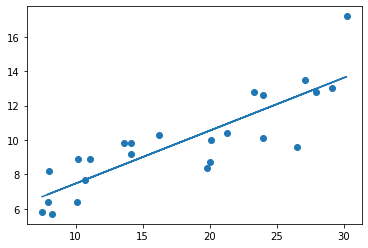

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df.temp, df.sales)
plt.plot(df.temp, lr.predict(x))
plt.show()

In [9]:
print('sales = %.3ftemp + %.3f' % (lr.coef_, lr.intercept_))

sales = 0.307temp + 4.397


In [10]:
0.307*30 + 4.397

13.607

In [12]:
def myFit(x, y):
  s = 0   # 各データからの距離の2乗の総和
  min_s = 1000000   # 最小のsを初期化
  
  # 傾きと切片の取り得る最大値を計算
  res = []
  for i in range(len(x) - 1):
    res.append((y[i+1] - y[i]) / (x[i+1] - x[i]))
  max_a = (sum(res) / len(res))   # 傾きの取り得る最大値
  max_b = sum(y) / len(y)   # 切片の取り得る最大値

  tick_max_a = [i/10 for i in range(int(max_a+1)*10)]
  tick_max_b = [i/10 for i in range(int(max_b+1)*10)]

  # tmp_bを0から0.1ずつmax_bまで変化させる
  for tmp_b in tick_max_b:    
    # tmp_aを0から0.1ずつmax_aまで変化させる
    for tmp_a in tick_max_a:   
      # 各データからの距離の2乗の総和（s）を求める
      for i in range(len(x)):   
      
        s = s + (y[i] - (tmp_a * x[i] + tmp_b))**2 
      
      if min_s > s :   # sが最小かどうかを判定する
        min_s = s
        min_a = round(tmp_a, 1)
        min_b = round(tmp_b, 1)
        
      s = 0
    tmp_a = 0
    
  print("回帰式：y =", min_a, "* x +", min_b)
  
  return min_a, min_b

In [13]:
# Part 3 線形回帰
x = [2, 4, 6]
y = [2, 3, 5]

a, b = myFit(x, y)

回帰式：y = 0.8 * x + 0.1


In [14]:
# テストデータ
x = [6, 7, 8, 10, 12, 15, 19, 20]
y = [7, 3, 5,  6, 10,  3, 10, 12]

a, b = myFit(x, y)

回帰式：y = 0.4 * x + 2.2


In [15]:
import numpy as np

# テストデータ
x = [6, 7, 8, 10, 12, 15, 19, 20]
y = [7, 3, 5,  6, 10,  3, 10, 12]

coe = np.polyfit(x, y, 1)
a = coe[0]
b = coe[1]
print("回帰式：y =", a, "* x +", b)

回帰式：y = 0.38940234134319157 * x + 2.278496611213796


In [16]:
import pandas as pd

df = pd.read_csv("ice_sales.csv")
a, b = myFit(df.temp, df.sales)

回帰式：y = 0.3 * x + 4.5


In [17]:
def myPredict(val, a, b):
  y = a * val + b
  return y

In [18]:
sales = myPredict(30, a, b)
print(sales)

13.5


In [19]:
def myFit2(x, y):
  n = len(x)           # データの個数
  x_ave = sum(x) / n   # xの平均値を求める
  y_ave = sum(y) / n   # yの平均値を求める

  cov_xy = 0   # xとyの共分散の変数の初期化
  var_x =  0   # xの分散の変数の初期化

  # xとyの共分散と、xの分散を求める
  for xi, yi  in zip(x, y):
    cov_xy = cov_xy + (xi - x_ave) * (yi - y_ave)
    var_x = var_x + (xi - x_ave)**2
  cov_xy = cov_xy / n
  var_x = var_x / n

  a = cov_xy / var_x
  b = y_ave - a * x_ave

  print("回帰式：y =", a, "* x +", b)

  return a, b

In [20]:
a, b = myFit2(df.temp, df.sales)
sales = myPredict(30, a, b)
print(sales)

回帰式：y = 0.30748822784825974 * x + 4.396562631853734
13.621209467301526
